# Name: Kirti singh
# Linkedin:linkedin.com/in/kirti-singh-baghel-05384b153

### Task #1: Predict the percentage of a student based on the no. of study hours.
### This is a simple linear regression task as it involves just 2 variables.You can use R, Python, SAS Enterprise Miner or any other tool.

### Q: What will be predicted score if a student studies for 9.25 hrs/ day?

# Linear Regression:
## Linear regression is a statistical method for modelling relationship between a dependent variable with a given set of independent variables.

## In this given task I'll be performing Simple Linear Regression. Simple linear regression is an approach for predicting a response using a single feature. So, I'll be using number of study hours of a student to predict the percentage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df=data.copy()

In [4]:
df.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


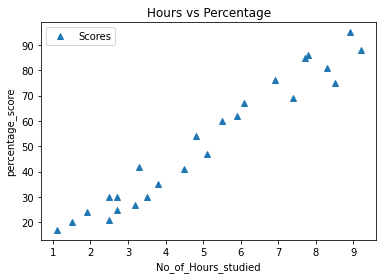

In [10]:
df.plot(x="Hours",y="Scores",style="^")
plt.title('Hours vs Percentage') 
plt.xlabel("No_of_Hours_studied")
plt.ylabel("percentage_score")
plt.show()

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## separating target variable and independent variable


In [12]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [13]:
# Train_test_split to our model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [14]:
## implementing linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [15]:
# checking intercept and coefficint
print("intercept=",lr.intercept_)
print("coefficinet=",lr.coef_)

intercept= 2.018160041434683
coefficinet= [9.91065648]


In [16]:
line=lr.coef_*x+lr.intercept_


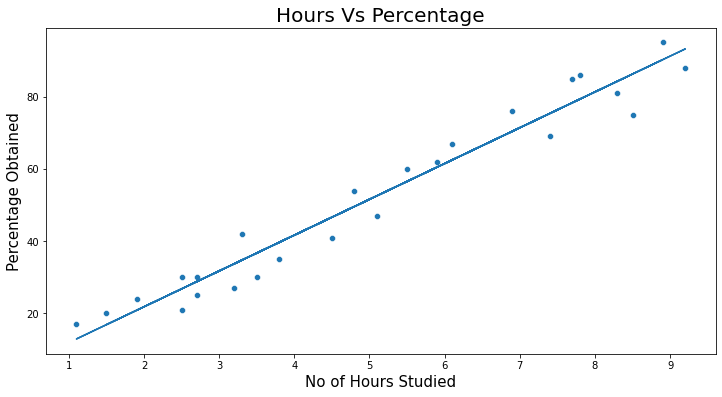

In [17]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x=data['Hours'], y=data['Scores'])
ax.set_xlabel('No of Hours Studied',fontdict={'fontsize' : 15})
ax.set_ylabel('Percentage Obtained',fontdict={'fontsize' : 15})
ax.set_title("Hours Vs Percentage",fontdict={'fontsize' : 20})
plt.plot(x, line)
plt.show()

In [18]:
y_pred = lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2 = r2_score(y_test, y_pred)
r2

0.9454906892105356

Q: What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hrs = [[9.25]]
pred = lr.predict(hrs)

print(f"If a student will study for {hrs}, predicted score will be {pred}")

If a student will study for [[9.25]], predicted score will be [93.69173249]


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
